In [12]:
from datetime import datetime, date
import calendar
from time import mktime
import pandas, sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from pytz import utc, timezone

datafile_16 = "Resources/FY_2016_Dallas_Animal_Shelter_Data.csv"
datafile_17 = "Resources/FY_2017_Dallas_Animal_Shelter_Data.csv"
datafile_18 = "Resources/FY_2018_Dallas_Animal_Shelter_Data.csv"
datafile_19 = "Resources/FY_2019_Dallas_Animal_Shelter_Data.csv"
datafile_20 = "Resources/FY2020_Dallas_Animal_Shelter_Data.csv"
datafile_21 = "Resources/FY2021_Dallas_Animal_Shelter_Data.csv"

df_2016 = pd.read_csv(datafile_16)
df_2017 = pd.read_csv(datafile_17)
df_2018 = pd.read_csv(datafile_18)
df_2019 = pd.read_csv(datafile_19)
df_2020 = pd.read_csv(datafile_20)
df_2021 = pd.read_csv(datafile_21)


In [13]:
# Merge All the dataframes into one
df_16_21 = [df_2016, df_2017, df_2018, df_2019, df_2020, df_2021]
dallas_shelter_df = pd.concat(df_16_21)

In [14]:
dallas_shelter_df.head()

,Animal Id,Animal Type,Animal Breed,Kennel Number,Kennel Status,Tag Type,Activity Number,Activity Sequence,Source Id,Census Tract,...,Service Request Number,Outcome Condition,Chip Status,Animal Origin,Additional Information,Month,Year,Unnamed: 16,Outcome Subtype,Unnamed: 27
0,A0000000,NaN,NaN,FREEZER,UNAVAILABLE,NaN,A16-017406,1,P0000000,701,...,NaN,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,UNABLE TO SCAN,FIELD,NaN,JUN.2016,FY2016,NaN,NaN,NaN
1,A0001656,DOG,LABRADOR RETR,LAB 01,LAB,NaN,NaN,1,P0003571,20500,...,NaN,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN CHIP,OVER THE COUNTER,NaN,JUL.2016,FY2016,NaN,NaN,NaN
2,A0014681,DOG,PIT BULL,PAWS 24,UNAVAILABLE,NaN,NaN,1,P0721470,12302,...,50020,TREATABLE MANAGEABLE NON-CONTAGIOUS,SCAN NO CHIP,FIELD,TAGGHOUSEBROKEN/FREE ADOPT,FEB.2016,FY2016,NaN,NaN,NaN
3,A0117773,DOG,PIT BULL,LAB 01,LAB,NaN,NaN,1,P0062546,2200,...,NaN,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,SCAN NO CHIP,OVER THE COUNTER,NaN,JUL.2016,FY2016,NaN,NaN,NaN
4,A0119934,CAT,RUSSIAN BLUE,LOST,LOST REPORT,NaN,NaN,1,P0038200,75214,...,NaN,HEALTHY,UNABLE TO SCAN,OVER THE COUNTER,NaN,JUL.2016,FY2016,NaN,NaN,NaN


In [15]:
kennel_status = dallas_shelter_df["Kennel Status"].value_counts()
kennel_status

UNAVAILABLE                 85993
IMPOUNDED                   51826
LAB                         29991
AVAILABLE                   17722
LOST REPORT                  2226
RELEASED FROM QUARANTINE     1511
WILDLIFE                     1309
FOUND REPORT                  833
EU RISK                       631
PRE-LAB                       394
PENDING                       310
LIVESTOCK                      29
EVALUATION                     28
NOTCH EAR                      15
EXOTIC                          3
Name: Kennel Status, dtype: int64

In [16]:
API_petfinder_data = "Resources/Animals.csv"
petfinder_df_pre = pd.read_csv(API_petfinder_data)

In [17]:
petfinder_df_pre.head()

,Unnamed: 0,id,organization_id,url,type,species,age,gender,size,coat,...,contact.address.state,contact.address.postcode,contact.address.country,animal_id,animal_type,organization_id.1,primary_photo_cropped.small,primary_photo_cropped.medium,primary_photo_cropped.large,primary_photo_cropped.full
0,0,51329854,CO502,https://www.petfinder.com/cat/bird-51329854/co...,Cat,Cat,Young,Male,Medium,NaN,...,CO,80304,US,51329854,cat,co502,NaN,NaN,NaN,NaN
1,1,51329850,IA172,https://www.petfinder.com/dog/negan-51329850/i...,Dog,Dog,Adult,Male,Large,NaN,...,IA,50265,US,51329850,dog,ia172,NaN,NaN,NaN,NaN
2,2,51329851,IA172,https://www.petfinder.com/dog/kong-51329851/ia...,Dog,Dog,Senior,Male,Medium,NaN,...,IA,50265,US,51329851,dog,ia172,NaN,NaN,NaN,NaN
3,3,51329852,IA172,https://www.petfinder.com/dog/ziko-51329852/ia...,Dog,Dog,Adult,Male,Large,NaN,...,IA,50265,US,51329852,dog,ia172,NaN,NaN,NaN,NaN
4,4,51329853,IA172,https://www.petfinder.com/dog/coco-51329853/ia...,Dog,Dog,Senior,Female,Small,NaN,...,IA,50265,US,51329853,dog,ia172,NaN,NaN,NaN,NaN


In [18]:
petfinder_df = petfinder_df_pre.drop(columns=['Unnamed: 0', 'id', 'organization_id', 'url', 'species', 'coat', 'tags', 'name', 'description', 'organization_animal_id', 'photos', 'contact.address.state', 'primary_photo_cropped', 'videos', 'published_at', 'distance', 'breeds.primary', 'contact.address.city', 'contact.address.postcode', 'contact.address.country', 'breeds.secondary', 'breeds.mixed', 'breeds.unknown', 'colors.primary', 'colors.secondary', 'colors.tertiary', 'attributes.spayed_neutered', 'contact.phone', 'attributes.house_trained', 'attributes.declawed', 'attributes.special_needs', 'attributes.shots_current', 'environment.children', 'environment.dogs', 'environment.cats', 'contact.email', 'contact.address.address1', 'contact.address.address2', 'animal_id', 'animal_type', 'organization_id.1', 'primary_photo_cropped.small', 'primary_photo_cropped.medium', 'primary_photo_cropped.large', 'primary_photo_cropped.full', 'status_changed_at'])
petfinder_df.head(11)


,type,age,gender,size,status
0,Cat,Young,Male,Medium,adoptable
1,Dog,Adult,Male,Large,adoptable
2,Dog,Senior,Male,Medium,adoptable
3,Dog,Adult,Male,Large,adoptable
4,Dog,Senior,Female,Small,adoptable
5,Dog,Baby,Male,Small,adoptable
6,Dog,Baby,Female,Small,adoptable
7,Dog,Adult,Male,Medium,adoptable
8,Dog,Adult,Female,Medium,adoptable
9,Cat,Adult,Female,Medium,adoptable


In [19]:
type_counts = petfinder_df["type"].value_counts()
type_counts

Dog                     5811
Cat                     3866
Small & Furry            140
Rabbit                   119
Bird                      47
Barnyard                   8
Scales, Fins & Other       7
Horse                      2
Name: type, dtype: int64

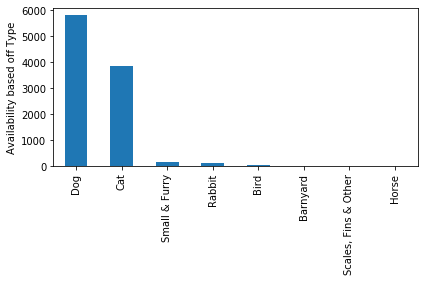

In [21]:
type_chart = type_counts.plot(kind="bar")

# Set x and Y label
type_chart.set_xlabel("")
type_chart.set_ylabel("Availability based off Type")


plt.tight_layout()
plt.savefig('/users/ChrisVelasquez/Desktop/type_chart')
plt.show()

In [22]:
gender_counts = petfinder_df["gender"].value_counts()
gender_counts

Male       5131
Female     4854
Unknown      15
Name: gender, dtype: int64

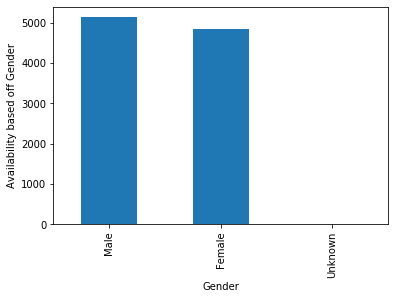

<Figure size 432x288 with 0 Axes>

In [92]:
gender_chart = gender_counts.plot(kind="bar")

# Set X and Y labels
gender_chart.set_xlabel("Gender")
gender_chart.set_ylabel("Availability based off Gender")

plt.show()
plt.tight_layout()

In [78]:
age_count = petfinder_df["age"].value_counts()
age_count

Adult     4084
Young     2845
Baby      2597
Senior     474
Name: age, dtype: int64

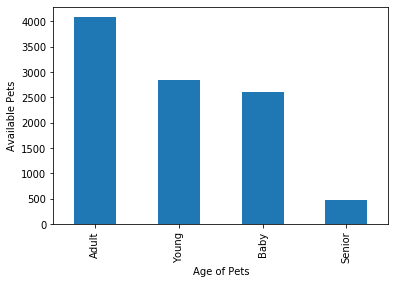

<Figure size 432x288 with 0 Axes>

In [87]:
# Create bar chart to represent Ages
age_chart = age_count.plot(kind='bar')

# Set X and Y Labels
age_chart.set_xlabel("Age of Pets")
age_chart.set_ylabel("Available Pets")

plt.show()
plt.tight_layout()

In [77]:
size_count = petfinder_df["size"].value_counts()
size_count

Medium         5212
Small          2709
Large          1969
Extra Large     110
Name: size, dtype: int64

Text(0, 0.5, 'Available Pets')

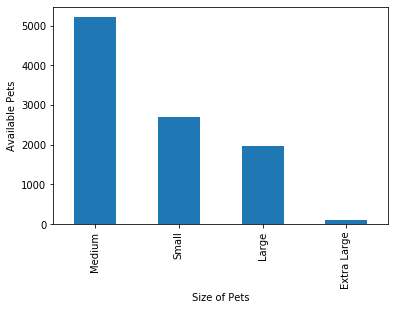

In [88]:
# Create chart for size count
size_chart = size_count.plot(kind="bar")

# Set X and Y label
size_chart.set_xlabel("Size of Pets")
size_chart.set_ylabel("Available Pets")
save

In [76]:
status_count = petfinder_df["status"].value_counts()
status_count

adoptable    10000
Name: status, dtype: int64